# Argument Quality Analysis


### load data:


In [1]:
import pandas as pd
data = pd.read_csv('all.csv', encoding = 'latin-1')
data.head()

,#id,rank,argument
0,arg219207,0.00650,Bottled water consumption has grown exponentia...
1,arg219237,0.06618,"jesus loves plastic water bottles, and you can..."
2,arg219206,0.00558,Americans spend billions on bottled water ever...
3,arg219203,0.00773,The American Water companies are Aquafina (Pep...
4,arg219225,0.00536,Banning plastic bottled water would be a huge ...


In [2]:
ranks = data['rank']
arguments = data['argument']
ranks.head(), arguments.head()

(0    0.00650
 1    0.06618
 2    0.00558
 3    0.00773
 4    0.00536
 Name: rank, dtype: float64,
 0    Bottled water consumption has grown exponentia...
 1    jesus loves plastic water bottles, and you can...
 2    Americans spend billions on bottled water ever...
 3    The American Water companies are Aquafina (Pep...
 4    Banning plastic bottled water would be a huge ...
 Name: argument, dtype: object)

### Functions to collect parts of speech: 

<h4>all parts of speech respond to this annotations --> <h4/> 
<url> https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html<url/>

<h4>Collecting modal verbs ratios : </h4>


In [3]:
def getModals(words, lenght,all_md):
    can = 0
    could = 0
    might = 0
    may = 0
    must = 0
    should = 0
    will = 0
    would = 0
    shall = 0
    md = 0
    for a in words:
        if a == 'could':
            could+=1
        if a == 'can':
            can+=1    
        if a == 'might':
            might+=1
        if a == 'may':
            may+=1
        if a == 'should':
            should+=1 
        if a == 'will':
            will+=1    
        if a == 'would':
            would+=1    
        if a == 'shall':
            shall+=1   
        if a == 'must':
            must+=1    
    if can != 0 :        
        Can.append(can/lenght) 
    else: Can.append(0)   
    if could!= 0:
        Could.append(could/lenght)
    else: Could.append(0)
    if might != 0:    
         Might.append(might/lenght)
    else: Might.append(0) 
    if may != 0:
         May.append(may/lenght)
    else: May.append(0) 
    if must != 0:        
         Must.append(must/lenght)
    else: Must.append(0)
    if should != 0:
         Should.append(should/lenght)
    else: Should.append(0)   
    if will != 0:        
         Will.append(will/lenght)
    else: Will.append(0)
    if would != 0:
         Would.append(would/lenght)
    else: Would.append(0)    
    if shall != 0:
         Shall.append(shall/lenght)
    else: Shall.append(0)
    if all_md is not None:
        Modals.append(all_md/lenght)
        md = all_md/lenght
    else: Modals.append(0)    
    return md

 <h4>Collecting superlative adjectives and adverb ratios along with all adjectvie and adverb ratios in a text</h4>

In [4]:
def getAdjAdv(counts,lenght):
    jjs = 0
    jj = 0
    jjr = 0
    rbs = 0
    rbr = 0
    rb = 0
    jjs_ratio = 0
    rbs_ratio = 0
    advb_ratio = 0
    adj_ratio = 0
    if counts.get('JJS')is not None:
        jjs = counts.get('JJS')
    if counts.get('JJ') is not None:
        jj = counts.get('JJ')
    if counts.get('JJR') is not None:
        jjr = counts.get('JJR')
    if counts.get('RB') is not None:
        rb = counts.get('RB')
    if counts.get('RBS') is not None:
        rbs = counts.get('RBS')
    if counts.get('RBR') is not None:
        rbr = counts.get('RBR')
    
    all_advb = rb + rbr + rbs
    all_adj = jjs+jj+jjr
    if all_advb != 0:
        rbs_ratio = rbs/all_advb
        advb_ratio = all_advb/lenght
    if all_adj != 0:
        jjs_ratio = jjs/all_adj
        adj_ratio = all_adj/lenght
    jjs_ratios.append(jjs_ratio)
    rbs_ratios.append(rbs_ratio)
    adj_ratios.append(adj_ratio)
    advb_ratios.append(advb_ratio)
    return advb_ratio, adj_ratio    

<h4> Collecting verb and nouns ratios </h4>

In [5]:
def noun_verb_rates(counts, lenght):
    all_verbs = 0
    all_nouns = 0
    if counts.get('VB') is not None:
        all_verbs += counts.get('VB')
    if counts.get('VBG') is not None:
        all_verbs += counts.get('VBG')
    if counts.get('VBD') is not None:
        all_verbs += counts.get('VBD')   
    if counts.get('VBN') is not None:
        all_verbs += counts.get('VBN')      
    if counts.get('VBP') is not None:
        all_verbs += counts.get('VBP')      
    if counts.get('VBZ') is not None:
        all_verbs += counts.get('VBZ') 
    if counts.get('NN') is not None:
        all_nouns += counts.get('NN')
    if counts.get('NNS') is not None:
        all_nouns += counts.get('NNS')    
    if counts.get('NNP') is not None:
        all_nouns += counts.get('NNP')    
    if counts.get('NNPS') is not None:
        all_nouns += counts.get('NNPS')    
        
    if all_verbs != 0:
        all_verbs = all_verbs /lenght
    if all_nouns != 0:
        all_nouns = all_nouns /lenght
    noun_ratios.append(all_nouns)
    verb_ratios.append(all_verbs)
    return all_nouns, all_verbs

<h4> Collecting prepositions, pronomens and interjection ratios </h4>

In [6]:
def prep_pro_interj(counts, lenght):
    all_prep = 0
    all_interj = 0
    all_pro = 0
    if counts.get('UH') is not None:
        all_interj = counts.get('UH')
    if counts.get ('IN') is not None:
        all_prep = counts.get('IN')
    if counts.get('PRP') is not None:
        all_pro += counts.get('PRP')
    if counts.get ('PRP$') is not None:
        all_pro += counts.get ('PRP$')
    if all_pro != 0 :
        all_pro = all_pro / lenght
    if all_prep != 0:
        all_prep = all_prep / lenght
    if all_interj != 0:
        all_interj / lenght   
    prep_ratios.append(all_prep)
    interj_ratios.append(all_interj)
    pro_ratios.append(all_pro)
    return all_pro, all_prep, all_interj    

<h2>Extracting features from arguments</h2>

In [7]:
from nltk import word_tokenize, pos_tag
from pandas.tools.plotting import lag_plot
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
countVectorizer = CountVectorizer(ngram_range=(1, 2), max_df = 0.6, max_features = 10, analyzer='word')
Can = []
Could = []
Might = []
May = []
Must = []
Should = []
Will = []
Would = []
Shall = []
Modals = []
jjs_ratios = []
rbs_ratios = []
adj_ratios = []
advb_ratios = []
noun_ratios = []
verb_ratios = []
interj_ratios = []
pro_ratios = []
prep_ratios = []
contextuality_measure = []
for argument in arguments:
    words = word_tokenize(argument)
    tags = pos_tag(words)
    counts = Counter(tag for word, tag in tags)
    md = getModals(words,len(words),counts.get('MD'))           
       
    advb_ratio, adj_ratio = getAdjAdv(counts, len(words))
    noun_ratio, verb_ratio = noun_verb_rates(counts, len(words))
    pro_ratio, prep_ratio, interj_ratio = prep_pro_interj(counts, len(words))
    # noun ratio + adj ratio + prepositions ratio  - pronoun ratio - verb ratio -
    # adverb - interjection + 1
    context_measure = (noun_ratio + adj_ratio + prep_ratio - pro_ratio - verb_ratio - advb_ratio - interj_ratio+100)*0.5
    contextuality_measure.append(context_measure)
#print(contextuality_measure)    

#Getting n-grams
X = countVectorizer.fit_transform(arguments)
Z = X.toarray()

#making dataframe of all features 
features = pd.DataFrame(Z)   
features['adj'] = pd.Series(adj_ratios, index=features.index)
features['advb'] = pd.Series(advb_ratios, index=features.index)
features['noun'] = pd.Series(noun_ratios, index=features.index)
features['prep'] = pd.Series(prep_ratios, index=features.index)
features['pro'] = pd.Series(pro_ratios, index=features.index)
features['interj'] = pd.Series(interj_ratios, index=features.index)
features['verb'] = pd.Series(verb_ratios, index=features.index)
features['rbs'] = pd.Series(rbs_ratios, index=features.index)
features['jjs'] = pd.Series(jjs_ratios, index=features.index)
features['contextuality'] = pd.Series(contextuality_measure, index=features.index)
features['modals'] = pd.Series(Modals, index=features.index)
features['will'] = pd.Series(Will, index=features.index)
features['should'] = pd.Series(Should, index=features.index)
features['could'] = pd.Series(Could, index=features.index)
features['can'] = pd.Series(Can, index=features.index)
features['may'] = pd.Series(May, index=features.index)
features['might'] = pd.Series(Might, index=features.index)
features['shall'] = pd.Series(Shall, index=features.index)
features['would'] = pd.Series(Would, index=features.index)
features['must'] = pd.Series(Must, index=features.index)
#features['rank'] = pd.Series(ranks, index=features.index)
features.head()


,0,1,2,3,4,5,6,7,8,9,...,modals,will,should,could,can,may,might,shall,would,must
0,0,0,0,1,1,0,0,0,0,0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
1,0,0,0,0,0,0,0,0,1,1,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
2,1,1,0,2,0,1,1,3,2,0,...,0.016529,0.0,0.0,0.0,0.008264,0.0,0.0,0.0,0.008264,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
4,2,1,0,5,1,0,1,2,0,0,...,0.017699,0.0,0.0,0.0,0.008850,0.0,0.0,0.0,0.008850,0.0


<h3> Visualizing relations between different types of parts of speech and rank + contextuality measure </h3>

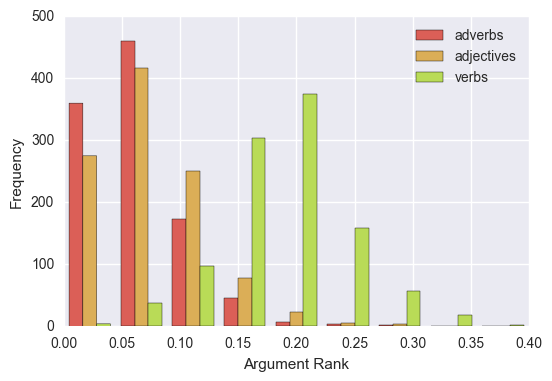

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

sns.set_palette('hls',n_colors = 10)
plt.hist(x = [advb_ratios, adj_ratios, verb_ratios], bins = np.linspace(0,0.4,10), label = ['adverbs', 'adjectives', 'verbs'])
#plt.xticks(np.around(ranks,1))
plt.xlabel('Argument Rank')
plt.ylabel('Frequency')
plt.legend()


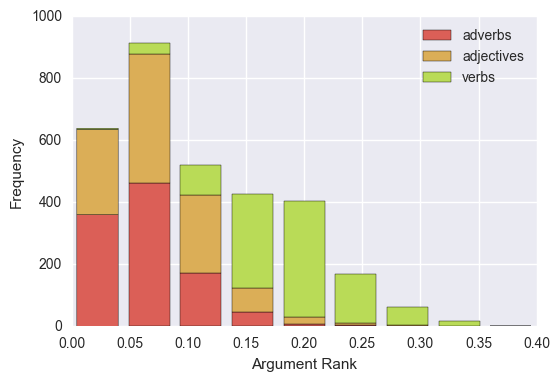

In [9]:
plt.hist(x=[advb_ratios,adj_ratios,verb_ratios],histtype = 'barstacked', bins = np.linspace(0,0.4,10), label = ['adverbs','adjectives', 'verbs'])
#plt.xticks(np.around(ranks,1))
plt.xlabel('Argument Rank')
plt.ylabel('Frequency')
plt.legend()


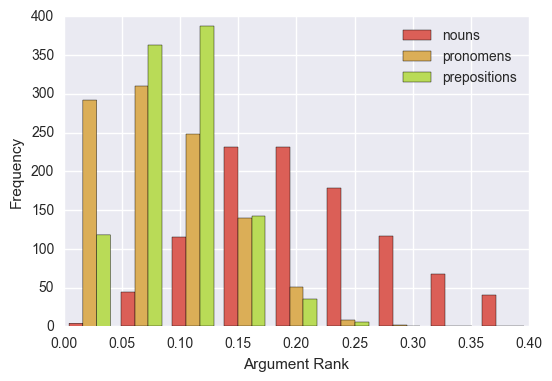

In [10]:
plt.hist(x=[noun_ratios,pro_ratios,prep_ratios], bins = np.linspace(0,0.4,10),  label = ['nouns','pronomens', 'prepositions'])
#plt.xticks(np.around(ranks,1))
plt.xlabel('Argument Rank')
plt.ylabel('Frequency')
plt.legend()


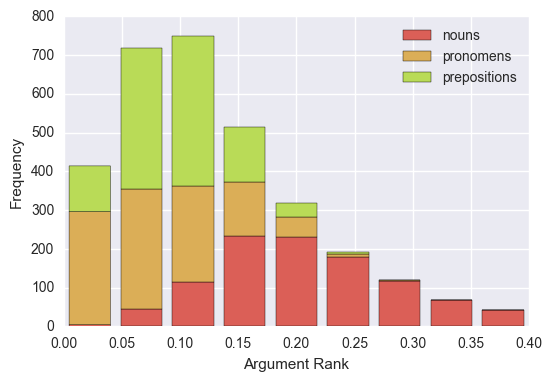

In [11]:
plt.hist(x=[noun_ratios,pro_ratios,prep_ratios],histtype = 'barstacked', bins = np.linspace(0,0.4,10), label = ['nouns','pronomens', 'prepositions'])
#plt.xticks(np.around(ranks,1))
plt.xlabel('Argument Rank')
plt.ylabel('Frequency')
plt.legend()


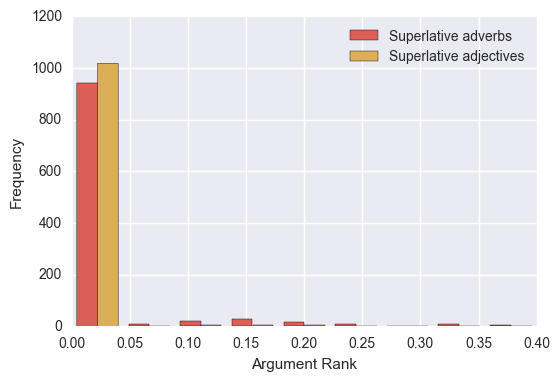

In [12]:
plt.hist(x=[jjs_ratios,rbs_ratios], bins = np.linspace(0,0.4,10), label = ['Superlative adverbs','Superlative adjectives'])
#plt.xticks(np.round(ranks,1))
plt.xlabel('Argument Rank')
plt.ylabel('Frequency')
plt.legend()


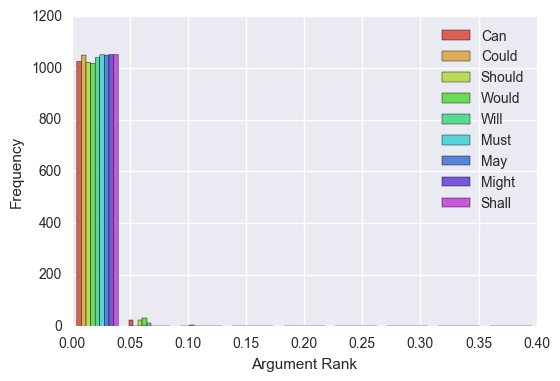

In [13]:
plt.hist(x=[Can,Could,Should,Would,Will,Must,May,Might,Shall], bins = np.linspace(0,0.4,10), label = ['Can','Could','Should','Would','Will','Must','May','Might','Shall'], histtype = 'bar')
plt.xlabel('Argument Rank')
plt.ylabel('Frequency')
plt.legend()


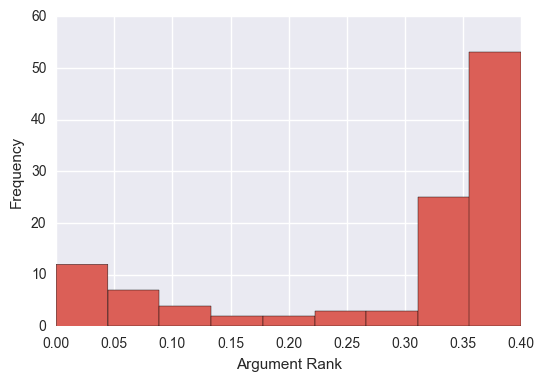

In [14]:
plt.hist(x=contextuality_measure, bins = np.linspace(0,0.4,10))
#plt.xticks(np.around(ranks,1))
plt.xlabel('Argument Rank')
plt.ylabel('Frequency')


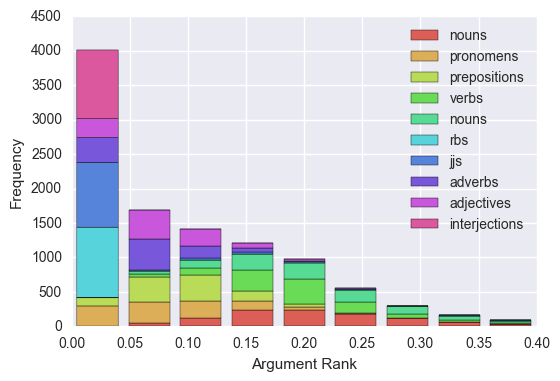

In [15]:
plt.hist(x=[noun_ratios,pro_ratios,prep_ratios,verb_ratios,noun_ratios,rbs_ratios,jjs_ratios,advb_ratios,adj_ratios,interj_ratios], bins = np.linspace(0,0.4,10), label = ['nouns','pronomens', 'prepositions','verbs','nouns','rbs','jjs','adverbs','adjectives','interjections'],histtype ='barstacked')
#plt.xticks(np.around(ranks,1))
plt.xlabel('Argument Rank')
plt.ylabel('Frequency')
plt.legend()


<h3> Creating a model and CV it </h3>


In [16]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr = SVR()
param_grid = {'kernel':['linear','rbf','poly','sigmoid'], 'C':[1,5,7,25,35,45]}
gscv = GridSearchCV(svr,param_grid, cv = 6)
gscv.fit(features, ranks)
print(gscv.best_params_)
print(gscv.best_score_)
print(gscv.score(features, ranks))



{'C': 7, 'kernel': 'rbf'}
-1.21219481514
-0.804215454753


<h4> Since in the above block the gridsearch got stuck when using epsilon or gamma I try it again for only the gamma and epsilon</h4>


In [17]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr = SVR(kernel = 'rbf', C = 7)
param_grid = {'gamma':[0.09,0.08,0.1,0.2], 'epsilon':[0.001,0.002,0.003,0.01,0.2]}
gscv = GridSearchCV(svr,param_grid, cv = 6)
gscv.fit(features, ranks)
print(gscv.best_params_)
print(gscv.best_score_)


{'gamma': 0.08, 'epsilon': 0.01}
-0.607930432374


In [18]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
kf = KFold(n_splits=10)
svr = SVR(kernel = 'rbf', C = 7, epsilon = 0.01, gamma = 0.2)
r2 = []
mae = []
mse = []
evs = []
for train_index, test_index in kf.split(ranks):
    x_train, x_test = features.iloc[train_index], features.iloc[test_index]
    y_train, y_test = ranks[train_index], ranks[test_index]
    svr.fit(x_train, y_train)
    predictions = svr.predict(x_test)
    mse.append(mean_squared_error(y_test,predictions))
    r2.append(r2_score(y_test,predictions))
    mae.append(median_absolute_error(y_test,predictions))
    evs.append(explained_variance_score(y_test,predictions))
    
    

print ('MSE score : {}'.format(np.asarray(mse).mean())) 
print ('R^2 score: {}'.format(np.asarray(r2).mean()))
print ('MAE score: {}'.format(np.asarray(mae).mean()))
print ('EVS score: {}'.format(np.asarray(evs).mean()))

MSE score : 0.004146412457083621
R^2 score: -0.8315483750752733
MAE score: 0.028533220431886653
EVS score: -0.8091207973469418


 Well it looks well tho negativity shows that there may be flaws but that can be fixed later with extracting more features like sentiment, exlamation marks and etc.
 

# Thank you for reading my notebook :)


In [19]:
from sklearn.externals import joblib
svr = SVR(kernel='rbf', C=7, epsilon = 0.01, gamma = 0.2)
svr.fit(features,ranks)
joblib.dump(countVectorizer.vocabulary_, 'C:\\Users\\nithe\\Desktop\\debateit\\static\\CountVect.pkl')
joblib.dump(svr, 'C:\\Users\\nithe\\Desktop\\debateit\\static\\Regression.pkl')

['C:\\Users\\nithe\\Desktop\\debateit\\static\\Regression.pkl']